In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import json # str --> dict
from math import radians
from scipy.stats import poisson as scipy_poisson
from scipy.special import factorial as sc_fact
from sympy import *
init_printing()
from sympy import Matrix
from sympy.physics.quantum import TensorProduct

In [2]:
def reader(filename):  #a fileok beolvasását segítő függvény
    f=open(filename,"r")
    data=f.readlines()
    cucc=[]
    for i in range(len(data)):
        try:
            cucc.append(json.loads(data[i][:-3]))
        except:
            pass
    f.close()
    return np.array(cucc)

In [3]:
dark=reader('filenev21.txt')  #beolvastuk a fileokat
light=reader('filenev22.txt')

In [4]:
def gaussian(x, h, a, x0, sigma):  #gauss függvény az illesztéshez
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + h

def poisson(x, h, a, x0, lamb): #poisson függvény az illesztéshez
    return  a * np.exp(-lamb) * lamb**(x-x0) /sc_fact(x-x0) + h

Illesztett paraméterek: [8.79114594e-02 7.43804785e+01 2.85206444e+02 1.61420444e+01]
Illesztés hibája: [3.4195951  4.03248812 0.779566   1.25273587]


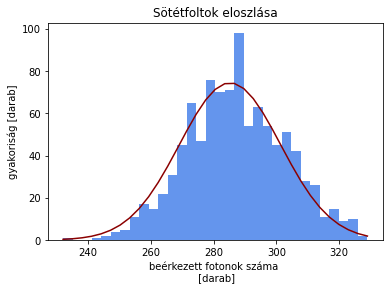

In [5]:
hist_data = []  #ebbe a listába kerülnek a két detektorra bérkezett fotonok
for i in range(len(dark)):
    hist_data.append(dark[i]['0'] + dark[i]['1'])
hist_dark = plt.hist(hist_data, int((max(hist_data)-min(hist_data))/3), color='cornflowerblue', label='Mért adatok')
#illesztés a Gauss-függvénnyel
gauss1_opt, gauss1_cov = curve_fit(gaussian, hist_dark[1][:-1], hist_dark[0], p0=(0, 70, 300, 10) )
gauss1_err = np.sqrt(np.diag(gauss1_cov))
#kapott eredmények ábrázolása

plt.plot(hist_dark[1], gaussian(hist_dark[1], *gauss1_opt), c='darkred', label='Illeszett Gauss-görbe')
plt.xlabel('beérkezett fotonok száma \n [darab]')
plt.ylabel('gyakoriság [darab]')
plt.title('Sötétfoltok eloszlása')
plt.savefig('dark.pdf', bbox_inches='tight')
print('Illesztett paraméterek:',gauss1_opt)
print('Illesztés hibája:',gauss1_err)

Illesztett paraméterek (Gauss): [ -2.80151417 113.09903025  11.32374998  -3.74697694]
Illesztés hibája (Gauss): [4.37329905 4.59194591 0.12125054 0.22396484]
Illesztett paraméterek (Poisson): [  -2.63783987 1061.73745274   -2.68797384   14.26816873]
Illesztés hibája (Poisson): [ 4.37007434 89.5904778   1.66758132  1.68912581]


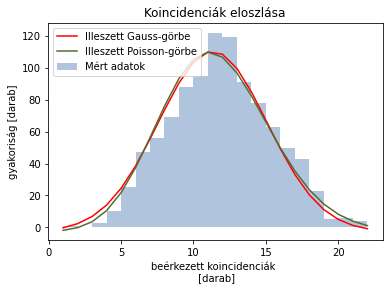

In [6]:
hist_data2 = []  #ebbe a listába kerülnek a koincidencia fotonok
for i in range(len(light)):
    hist_data2.append(light[i]['01'])
hist_light = plt.hist(hist_data2, int((max(hist_data2)-min(hist_data2))), color='lightsteelblue', label='Mért adatok')
#illesztés Gauss-eloszlásra
gauss2_opt, gauss2_cov = curve_fit(gaussian, hist_light[1][:-1], hist_light[0], p0=(0, 100, 12, 10) )
gauss2_err = np.sqrt(np.diag(gauss2_cov))
#illesztés Poisson-eoszlásra
poi1_opt, poi1_cov = curve_fit(poisson, hist_light[1][:-1], hist_light[0], p0=(0, 900, 0, 10) )
poi1_err = np.sqrt(np.diag(poi1_cov))
#ábrázolások

plt.plot(hist_light[1], gaussian(hist_light[1], *gauss2_opt), c='red', label='Illeszett Gauss-görbe')
plt.plot(hist_light[1], poisson(hist_light[1], *poi1_opt), c='darkolivegreen', label='Illeszett Poisson-görbe')
plt.xlabel('beérkezett koincidenciák \n [darab]')
plt.ylabel('gyakoriság [darab]')
plt.title('Koincidenciák eloszlása')
plt.legend(loc='upper left')
plt.savefig('koin.pdf', bbox_inches='tight')
print('Illesztett paraméterek (Gauss):',gauss2_opt)
print('Illesztés hibája (Gauss):',gauss2_err)
print('Illesztett paraméterek (Poisson):',poi1_opt)
print('Illesztés hibája (Poisson):',poi1_err)

In [7]:
#mért koincidenciák alice=0 esetén
a0k=[22,140,469,1059,1521,2353,2775,2998,3302,3346,3112,2907,2412,1851,1273,801,409,128,14]
a0b=[92,110,481,796,1111,1334,1596,1848,1834,1852,1701,1415,1195,888,639,371,186,87,74]
#mért koincidenciák alice=45 esetén
a45k=[12,102,293,554,879,1138,1422,1544,1624,1536,1478,1250,1074,824,558,315,143,33,15]
a45b=[706,936,1190,1317,1449,1501,1517,1360,1166,971,824,538,389,221,133,142,220,323,464]
#mért koincidenciák alice=90 esetén
a90b=[1226,1193,1003,799,504,377,198,116,86,107,183,260,403,486,601,728,853,877,810]
a90k=[25,42,41,70,66,92,112,102,88,127,110,86,68,64,48,28,22,18,22]
#mért koincidenciák alice=135 esetén
a135k=[18,58,218,556,831,1293,1538,1896,2004,2146,1913,1826,1550,1200,847,583,287,114,15]
a135b=[557,317,181,142,198,340,546,734,969,1131,1304,1388,1410,1211,1132,930,736,606,406]

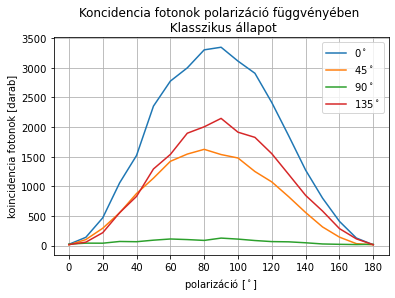

In [8]:
#klasszikus állapot ábrája
x=np.linspace(0,180,19)
y=np.linspace(0,180,10)
plt.plot(x,a0k,label='0$^\circ$')
plt.plot(x,a45k,label='45$^\circ$')
plt.plot(x,a90k,label='90$^\circ$')
plt.plot(x,a135k,label='135$^\circ$')
plt.legend()
plt.grid()
plt.xticks(y)
plt.xlabel('polarizáció [$^\circ$]')
plt.ylabel('koincidencia fotonok [darab]')
plt.title('Koncidencia fotonok polarizáció függvényében \n Klasszikus állapot')
plt.savefig('klasszik.pdf', bbox_inches='tight')

In [9]:
#S meghatározása klasszikus esetre

kE0225 = ( a0k[2] - a0k[12] - a90k[2] +  a90k[12]) / ( a0k[2] + a0k[12] + a90k[2] +  a90k[12] )
dkE0225 = kE0225 * ( (np.sqrt(a0k[2])+np.sqrt(a0k[12])+np.sqrt(a90k[2])+np.sqrt(a90k[12]) )  /  (a0k[2]-a0k[12]-a90k[2]+a90k[12])  +  (np.sqrt(a0k[2])+np.sqrt(a0k[12])+np.sqrt(a90k[2])+np.sqrt(a90k[12]) )  /  (a0k[2]+a0k[12]+a90k[2]+a90k[12]) )  

kE45225 = ( a45k[2] - a45k[12] - a135k[2] + a135k[12]) / ( a45k[2] + a45k[12]+ a135k[2] + a135k[12] )
dkE45225 = kE45225 * ( (np.sqrt(a45k[2])+np.sqrt(a45k[12])+np.sqrt(a135k[2])+np.sqrt(a135k[12]) )  /  (a45k[2]-a45k[12]-a135k[2]+a135k[12])  +  (np.sqrt(a45k[2])+np.sqrt(a45k[12])+np.sqrt(a135k[2])+np.sqrt(a135k[12]) )  /  (a45k[2]+a45k[12]+a135k[2]+a135k[12]) )

kE0675 = ( a0k[7] - a0k[16] - a90k[7] +  a90k[16] ) / ( a0k[7] + a0k[16] + a90k[7] +  a90k[16] )
dkE0675 = kE0675 * ( (np.sqrt(a0k[7])+np.sqrt(a0k[16])+np.sqrt(a90k[7])+np.sqrt(a90k[16]) )  /  (a0k[7]-a0k[16]-a90k[7]+a90k[16])  +  (np.sqrt(a0k[7])+np.sqrt(a0k[16])+np.sqrt(a90k[7] )+np.sqrt(a90k[16] ) )  /  (a0k[7] +a0k[16] +a90k[7] +a90k[16] ) )

kE45675 = ( a45k[7]  - a45k[16]  - a135k[7]  +  a135k[16]  ) / (a45k[7]  + a45k[16]  + a135k[7]  +  a135k[16]  )
dkE45675 = kE45675 * ( (np.sqrt(a45k[7] )+np.sqrt(a45k[16] )+np.sqrt(a135k[7] )+np.sqrt(a135k[16] ) )  /  (a45k[7] -a45k[16] -a135k[7] +a135k[16] )  +  (np.sqrt(a45k[7] )+np.sqrt(a45k[16] )+np.sqrt(a135k[7] )+np.sqrt(a135k[16] ) )  /  (a45k[7] +a45k[16] +a135k[7] +a135k[16] ) )

kS = kE0225 + kE45225 - kE0675 + kE45675 
dkS = dkE0225 + dkE45225 + dkE0675 + dkE45675

kS_ = kE0225 - kE45225- kE0675 - kE45675
dkS_ = dkE0225 + dkE45225 + dkE0675 + dkE45675

nk=(kS-2)/dkS
print(kS)
print(dkS)
print(kS_)
print(dkS_)
print(nk)

-1.2293554495760066
0.12008270840322062
-1.4733770610394785
0.12008270840322062
-26.892759936195738


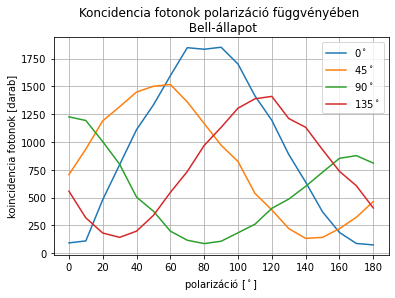

In [10]:
#Bell-állapot ábrája
plt.plot(x,a0b,label='0$^\circ$')
plt.plot(x,a45b,label='45$^\circ$')
plt.plot(x,a90b,label='90$^\circ$')
plt.plot(x,a135b,label='135$^\circ$')
plt.legend()
plt.grid()
plt.xticks(y)
plt.xlabel('polarizáció [$^\circ$]')
plt.ylabel('koincidencia fotonok [darab]')
plt.title('Koncidencia fotonok polarizáció függvényében \n Bell-állapot')
plt.savefig('bell.pdf', bbox_inches='tight')

In [11]:
#S meghatározása Bell esetre
bE0225 = ( a0b[2] - a0b[12] - a90b[2] +  a90b[12]) / ( a0b[2] + a0b[12] + a90b[2] +  a90b[12] )
dbE0225 = bE0225 * ( (np.sqrt(a0b[2])+np.sqrt(a0b[12])+np.sqrt(a90b[2])+np.sqrt(a90b[12]) )  /  (a0b[2]-a0b[12]-a90b[2]+a90b[12])  +  (np.sqrt(a0b[2])+np.sqrt(a0b[12])+np.sqrt(a90b[2])+np.sqrt(a90b[12]) )  /  (a0b[2]+a0b[12]+a90b[2]+a90b[12]) )  

bE45225 = ( a45b[2] - a45b[12] - a135b[2] + a135b[12]) / ( a45b[2] + a45b[12]+ a135b[2] + a135b[12] )
dbE45225 = bE45225 * ( (np.sqrt(a45b[2])+np.sqrt(a45b[12])+np.sqrt(a135b[2])+np.sqrt(a135b[12]) )  /  (a45b[2]-a45b[12]-a135b[2]+a135b[12])  +  (np.sqrt(a45b[2])+np.sqrt(a45b[12])+np.sqrt(a135b[2])+np.sqrt(a135b[12]) )  /  (a45b[2]+a45b[12]+a135b[2]+a135b[12]) )

bE0675 = ( a0b[7] - a0b[16] - a90b[7] +  a90b[16] ) / ( a0b[7] + a0b[16] + a90b[7] +  a90b[16] )
dbE0675 = bE0675 * ( (np.sqrt(a0b[7])+np.sqrt(a0b[16])+np.sqrt(a90b[7])+np.sqrt(a90b[16]) )  /  (a0b[7]-a0b[16]-a90b[7]+a90b[16])  +  (np.sqrt(a0b[7])+np.sqrt(a0b[16])+np.sqrt(a90b[7] )+np.sqrt(a90b[16] ) )  /  (a0b[7] +a0b[16] +a90b[7] +a90b[16] ) )

bE45675 = ( a45b[7]  - a45b[16]  - a135b[7]  +  a135b[16]  ) / (a45b[7]  + a45b[16]  + a135b[7]  +  a135b[16]  )
dbE45675 = bE45675 * ( (np.sqrt(a45b[7] )+np.sqrt(a45b[16] )+np.sqrt(a135b[7] )+np.sqrt(a135b[16] ) )  /  (a45b[7] -a45b[16] -a135b[7] +a135b[16] )  +  (np.sqrt(a45b[7] )+np.sqrt(a45b[16] )+np.sqrt(a135b[7] )+np.sqrt(a135b[16] ) )  /  (a45b[7] +a45b[16] +a135b[7] +a135b[16] ) )

# változónév: b*, mint blasszbus*
bS = bE0225 + bE45225 - bE0675 + bE45675 
dbS = dbE0225 + dbE45225 + dbE0675 + dbE45675

bS_ = bE0225 - bE45225- bE0675 - bE45675
dbS_ = dbE0225 + dbE45225 + dbE0675 + dbE45675

n=(bS-2)/dbS

print(bS)
print(dbS)
print(bS_)
print(dbS_)
print(n)

-0.21040954869212625
0.1802014455654703
-2.2400191055003176
0.1802014455654703
-12.266325288101234


In [12]:

alpha, beta, gamma, delta, eta = symbols('alpha,beta,gamma,delta,eta')
alpha_1, beta_1, alpha_2, beta_2 = symbols('alpha_1,beta_1,alpha_2,beta_2')
# Bell-egyenlőtlenség a mérési szögek alapján:

# szögek (amiket a mérésnél is használunk):
rad0      = radians(0)     # α
rad22dot5 = radians(22.5)  # β
rad45     = radians(45)    # α_bar
rad67dot5 = radians(67.5)  # β_bar

# Egyfoton állapotok (honlapon lévő notebook alapján):
state_0 = Matrix([[1],[0]])
state_1 = Matrix([[0],[1]])
state_random = Matrix([[alpha],[beta]])

# Bel Φ_+ állapot (labor honlapján lévő notebook alapján):
bell_phi_plusz = (TensorProduct(state_0,state_0)+TensorProduct(state_1,state_1))/sqrt(2)

Polar_X = Matrix([[1,0],[0,0]])
rotator = Matrix([[cos(gamma),-sin(gamma)],[sin(gamma),cos(gamma)]])
polar = rotator @ Polar_X @ rotator.T

def eab(alpha, beta, state):
    Npp=(state.T@TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta))@state)[0].simplify()
    Npm=(state.T@TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta+pi/2))@state)[0].simplify()
    Nmp=(state.T@TensorProduct(polar.subs(gamma,alpha+pi/2),polar.subs(gamma,beta))@state)[0].simplify()
    Nmm=(state.T@TensorProduct(polar.subs(gamma,alpha+pi/2),polar.subs(gamma,beta+pi/2))@state)[0].simplify()
    return (Npp-Npm-Nmp+Nmm)/(Npp+Npm+Nmp+Nmm).simplify()

def chsh(state, a, b, a_bar, b_bar, S=True):
    S=eab(a,b, state) - eab(a, b_bar, state) + eab(a_bar, b, state) + eab(a_bar, b_bar, state)
    S_=eab(a,b, state) - eab(a, b_bar, state) - eab(a_bar, b, state) - eab(a_bar, b_bar, state)
    return S,S_
    
Ssz     = chsh(bell_phi_plusz, rad0, rad22dot5, rad45, rad67dot5)[0]
Sbarsz = chsh(bell_phi_plusz, rad0, rad22dot5, rad45, rad67dot5)[1]
print(Ssz)
print(Sbarsz)

2.82842712474619
-3.33066907387547e-16


In [13]:
#mért értékek
a0b225=5166
a0b1125=15542
a0b675=19857
a0b1575=2628

a45b225=12663
a45b1125=5221
a45b675=14239
a45b1575=1857

a90b225=9183
a90b1125=1942
a90b675=1593
a90b1575=7843

a135b225=1621
a135b1125=14216
a135b675=6993
a135b1575=8862

In [14]:

#jegyzetben lévő képletek alapján az E értékei
E0225=(a0b225-a0b1125-a90b225+a90b1125)/(a0b225+a0b1125+a90b225+a90b1125)
E45225=(a45b225-a45b1125-a135b225+a135b1125)/(a45b225+a45b1125+a135b225+a135b1125)
E0675=(a0b675-a0b1575-a90b675+a90b1575)/(a0b675+a0b1575+a90b675+a90b1575)
E45675=(a45b675-a45b1575-a135b675+a135b1575)/(a45b675+a45b1575+a135b675+a135b1575)

dE0225=E0225*(np.sqrt(a0b225)+np.sqrt(a0b1125)+np.sqrt(a90b225)+np.sqrt(a90b1125))/(a0b225-a0b1125-a90b225+a90b1125)  +(np.sqrt(a0b225)+np.sqrt(a0b1125)+np.sqrt(a90b225)+np.sqrt(a90b1125))/(a0b225+a0b1125+a90b225+a90b1125)
dE45225=E45225*(np.sqrt(a45b225)+np.sqrt(a45b1125)+np.sqrt(a135b225)+np.sqrt(a135b1125))/(a45b225-a45b1125-a135b225+a135b1125)  +(np.sqrt(a45b225)+np.sqrt(a45b1125)+np.sqrt(a135b225)+np.sqrt(a135b1125))/(a45b225+a45b1125+a135b225+a135b1125)
dE0675=E0675*(np.sqrt(a0b675)+np.sqrt(a0b1575)+np.sqrt(a90b675)+np.sqrt(a90b1575))/(a0b675-a0b1575-a90b675+a90b1575)   +(np.sqrt(a0b675)+np.sqrt(a0b1575)+np.sqrt(a90b675)+np.sqrt(a90b1575))/(a0b675+a0b1575+a90b675+a90b1575)
dE45675=E45675*(np.sqrt(a45b675)+np.sqrt(a45b1575)+np.sqrt(a135b675)+np.sqrt(a135b1575))/(a45b675-a45b1575-a135b675+a135b1575)   +(np.sqrt(a45b675)+np.sqrt(a45b1575)+np.sqrt(a135b675)+np.sqrt(a135b1575))/(a45b675+a45b1575+a135b675+a135b1575)



In [15]:
#ezek alapján az S-ek

S=E0225+E45225-E0675+E45675
S_=E0225-E45225-E0675-E45675

dS=dE0225+dE45225-dE0675+dE45675
dS_=dE0225-dE45225-dE0675-dE45675
print(S)
print(dS)
print(S_)
print(dS_)

-0.2487278198745123
0.04276065342128949
-2.3291801972842805
-0.04066590691369397


In [16]:
#és a sértés mértéke
n=(S-2)/dS
n

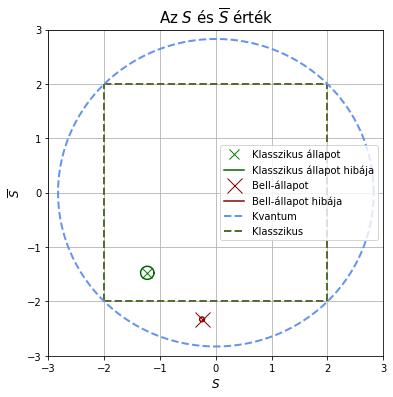

In [18]:
plt.figure(figsize=(6,6))
fs=12
theta = np.linspace(0, 2*np.pi, 200 )
#Klasszikus állapot és hibája:
a = dkS * np.cos(theta)
b = dkS * np.sin(theta)
plt.plot(kS, kS_, 'x', c='green', ms=10, label='Klasszikus állapot')
plt.plot(a+kS, b+kS_, c='darkgreen', label='Klasszikus állapot hibája')

#Bell-állapot és hibaja:
a = dS * np.cos(theta)
b = dS * np.sin(theta)
plt.plot(S, S_, 'x', c='darkred', ms=15,lw=5, label='Bell-állapot')
plt.plot(a+S, b+S_, c='darkred', label='Bell-állapot hibája')
# kör
a2 = 2*np.sqrt(2) * np.cos(theta)
b2 = 2*np.sqrt(2) * np.sin(theta)
plt.plot(a2,b2, c='cornflowerblue', ls='--',lw=2, label='Kvantum')
#négyzet
plt.vlines(-2,-2,2, color='darkolivegreen', ls='--',lw=2, label='Klasszikus')
plt.vlines( 2,-2,2, color='darkolivegreen', ls='--',lw=2)
plt.hlines(-2,-2,2, color='darkolivegreen', ls='--',lw=2)
plt.hlines( 2,-2,2, color='darkolivegreen', ls='--',lw=2)

plt.title('Az $S$ és $\\overline{S}$ érték', fontsize=fs+3)
plt.xlabel('$S$', fontsize=fs)
plt.ylabel('$\\overline{S}$', fontsize=fs)
plt.legend(fontsize=fs-2, loc=5)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()
plt.savefig('bullseye.pdf', bbox_inches='tight')
plt.show()